In [1]:
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Warning message:
“package ‘patchwork’ was built under R version 4.3.3”


In [ ]:
cellchat = readRDS("cellchat_popT_PD1.rds")

# Viz aggregated cell-cell communication network

In [3]:
ptm = Sys.time()
cellchat <- aggregateNet(cellchat)
execution.time = Sys.time() - ptm
print(as.numeric(execution.time, units = "secs"))

[1] 0.005982876


In [ ]:
ptm = Sys.time()
groupSize <- as.numeric(table(cellchat@idents))
# par(mfrow = c(1,2), xpd=TRUE)
pdf("../../man_figs_pdf/cell_chat_PD/cellchat_interactions_count_PD.pdf", width = 8, height = 8)
p1 = netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge = F, title.name = "Number of interactions")
dev.off()
pdf("../../man_figs_pdf/cell_chat_PD/cellchat_interaction_weights_PD.pdf", width = 8, height = 8)
p2 = netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge = F, title.name = "Interaction weights/strength")
dev.off()

png 
  2

png 
  2

# Viz edge weights from diff cell groups

[1] "Ast"   "Endo"  "ExN"   "InN"   "Mic"   "Oligo" "OPC"  


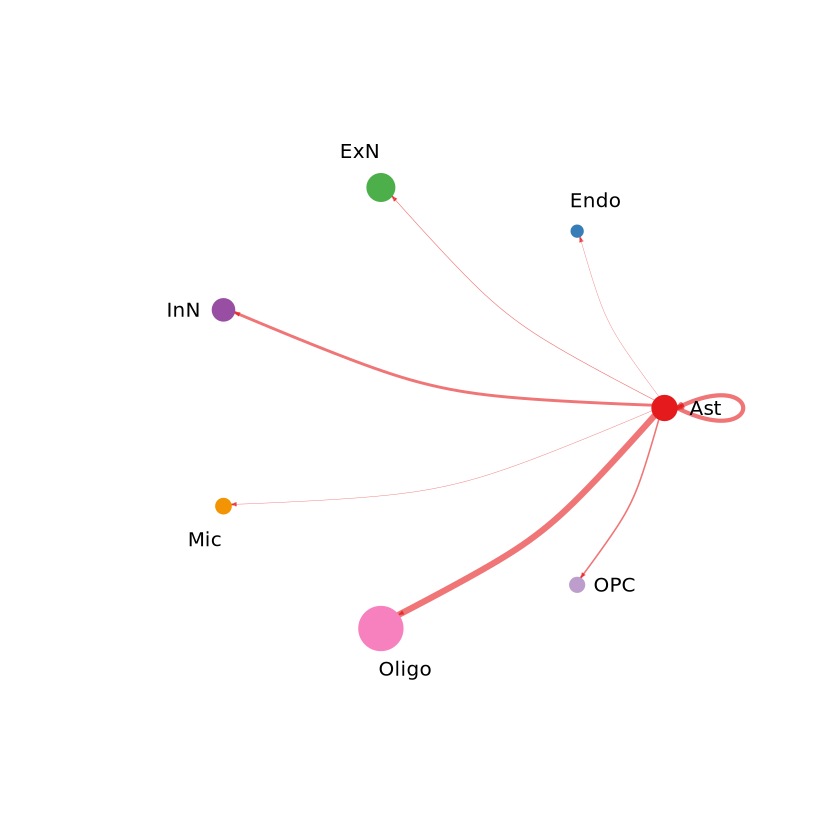

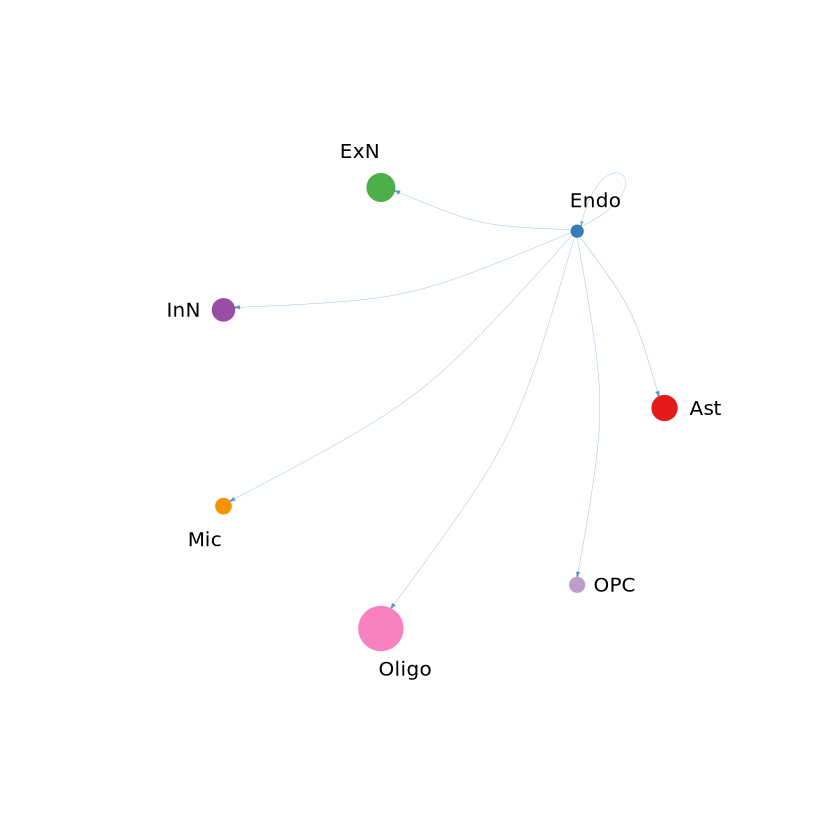

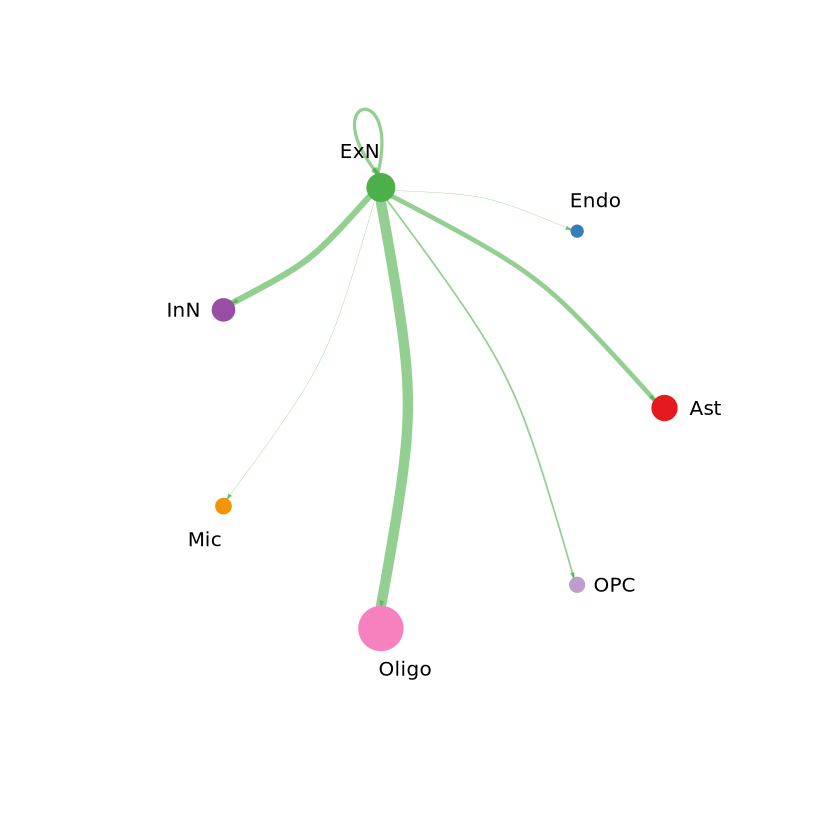

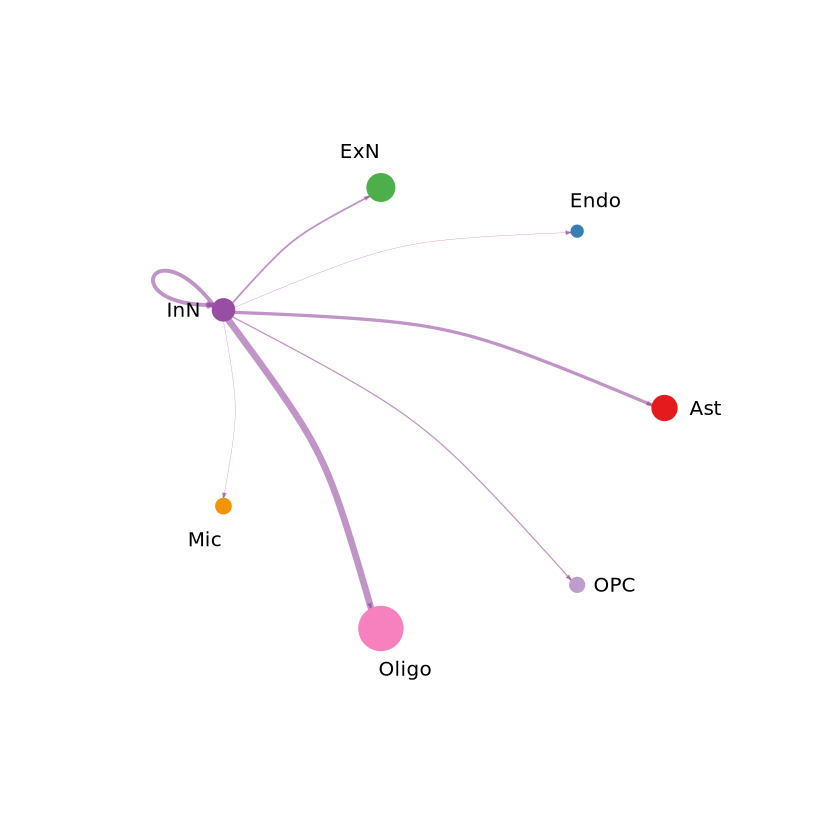

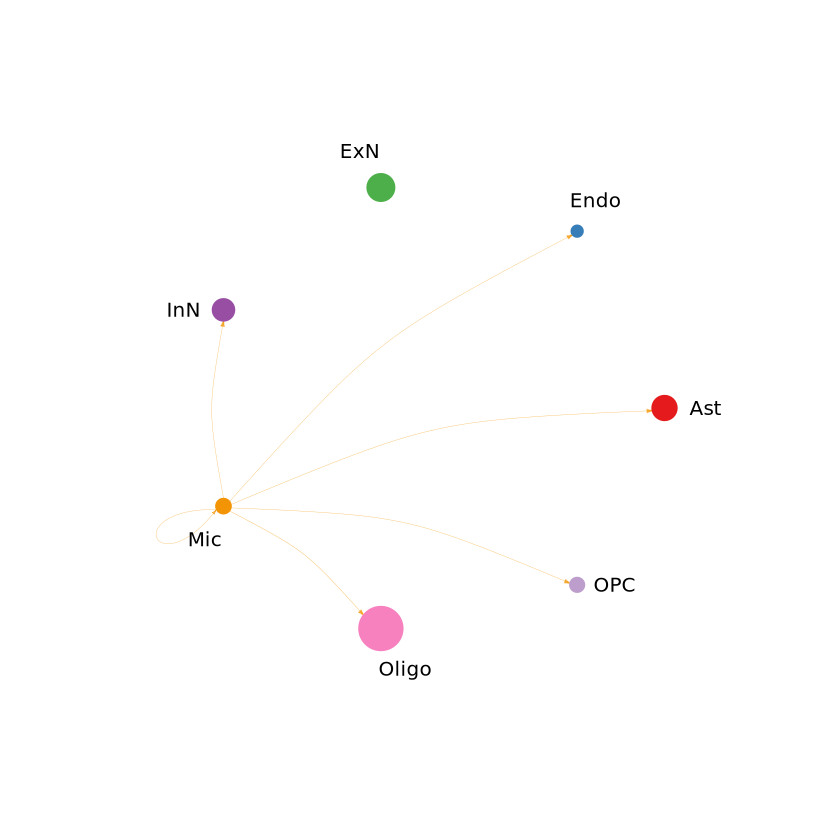

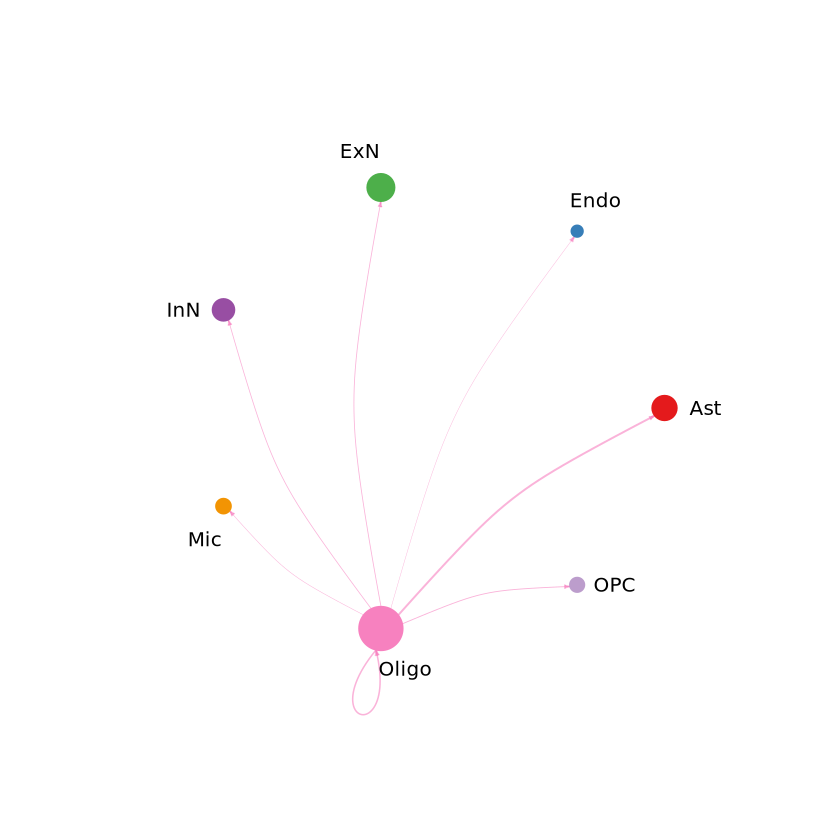

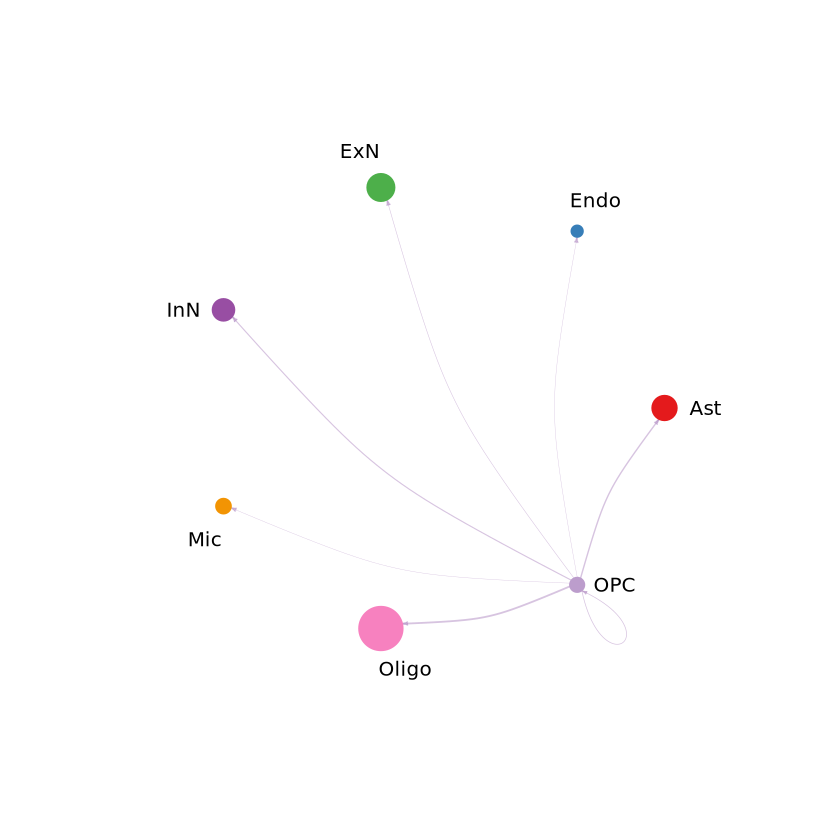

In [5]:
mat <- cellchat@net$weight
print(rownames(mat))
# par(mfrow = c(3,4), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

## Viz each signalling pathway

In [6]:
# all signaling pathways showing significant communications
cellchat@netP$pathways

[1] "NRG"    "SLIT"   "PTN"    "PTPR"   "FGF"    "SPP1"   "SLITRK" "PSAP"  
 [9] "BMP"    "SEMA3"  "IGF"    "PDGF"   "TULP"   "TGFb"   "EGF"    "VEGF"  
[17] "PROS"   "CypA"   "ANGPT"  "EDN"

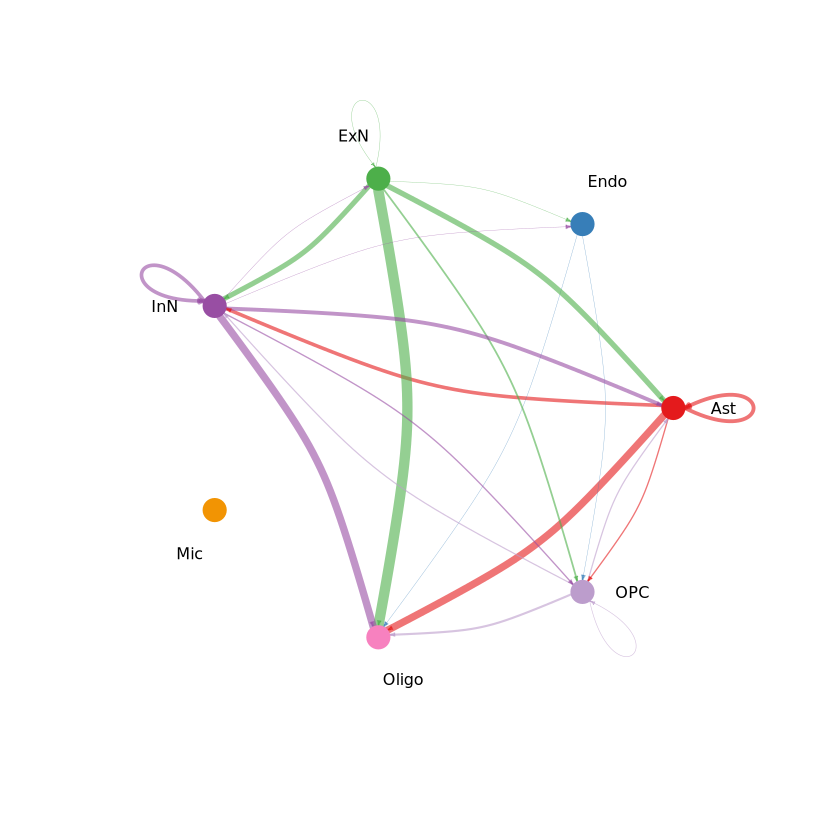

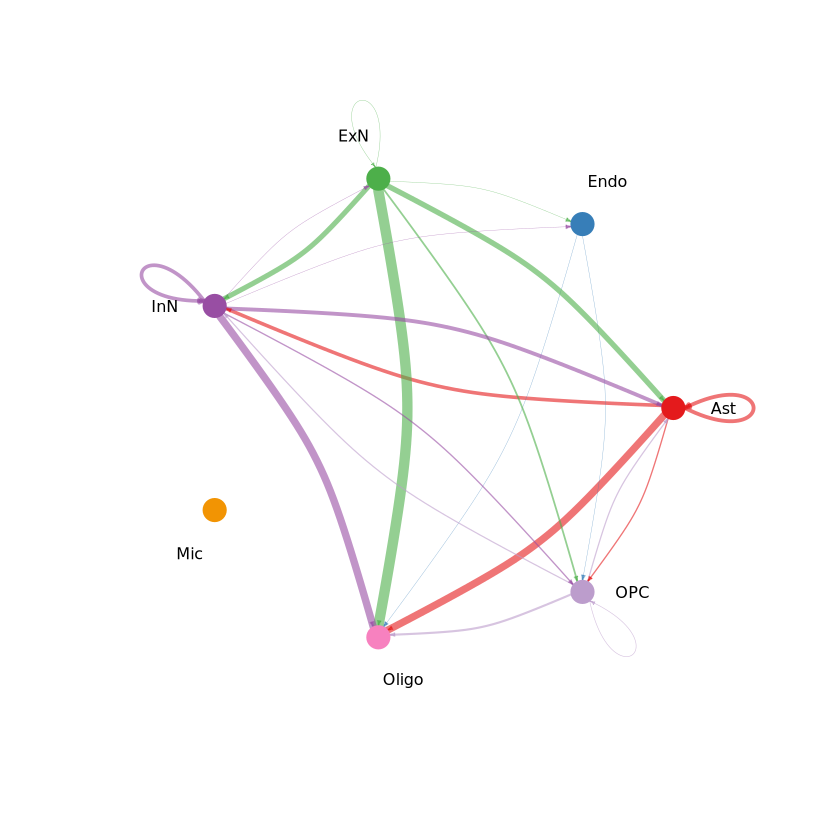

In [11]:
pathways.show <- c("NRG") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# # Circle plot
# par(mfrow=c(1,1))
# netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

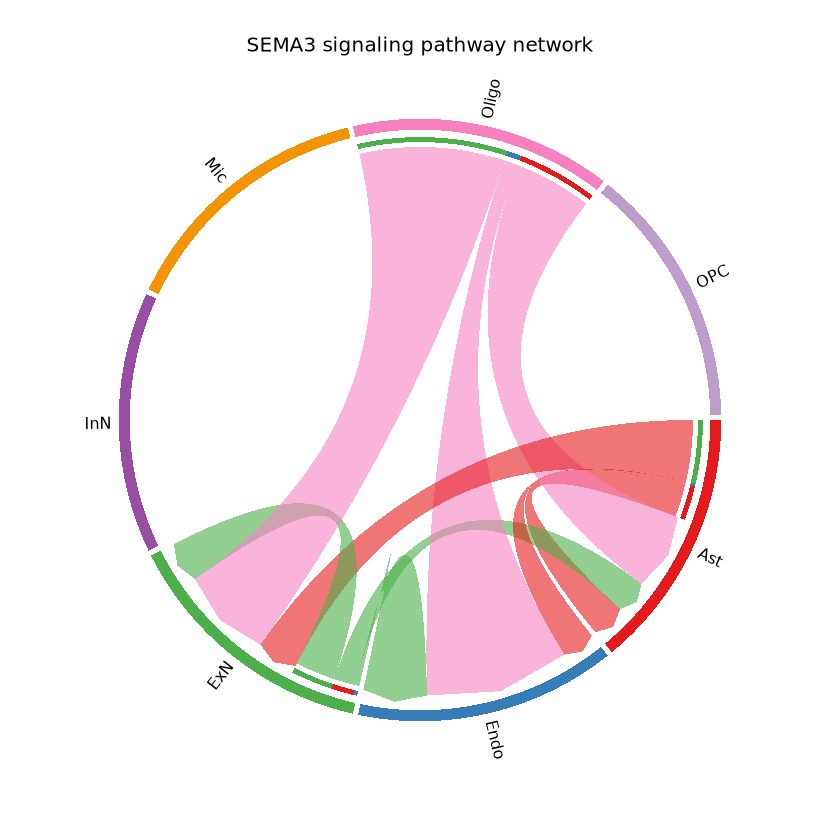

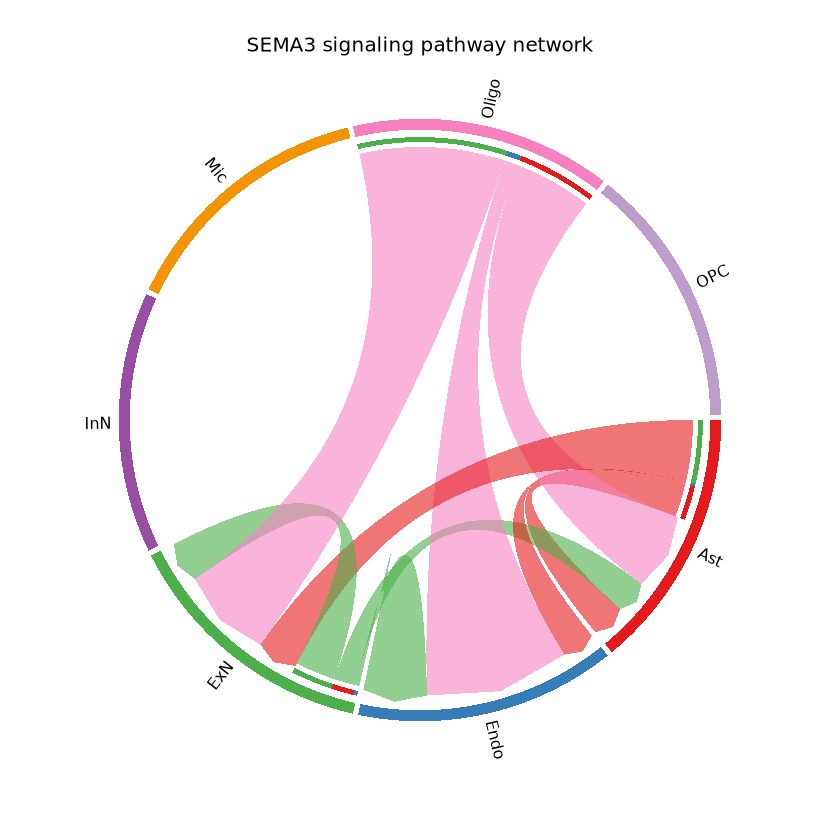

In [8]:
# Chord diagram
pathways.show <- c("SEMA3") 
netVisual_aggregate(
  cellchat,
  signaling = pathways.show,
  layout = "chord"
)

In [ ]:
# Heatmap
# par(mfrow=c(1,1))
p = netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")

## Viz single ligand-receptor pair

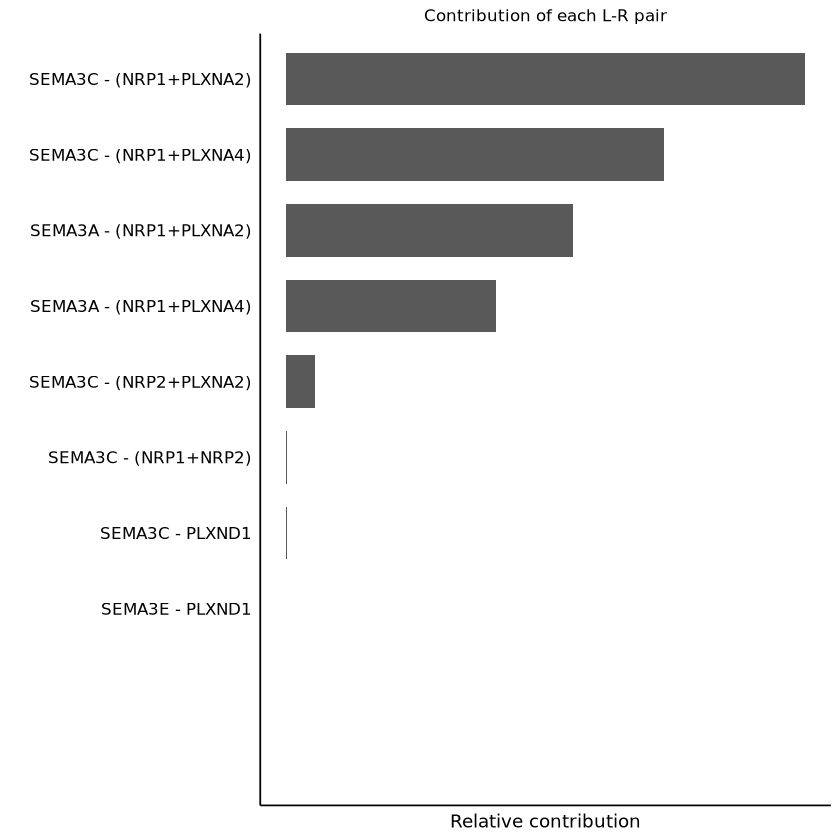

In [10]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[[1]]


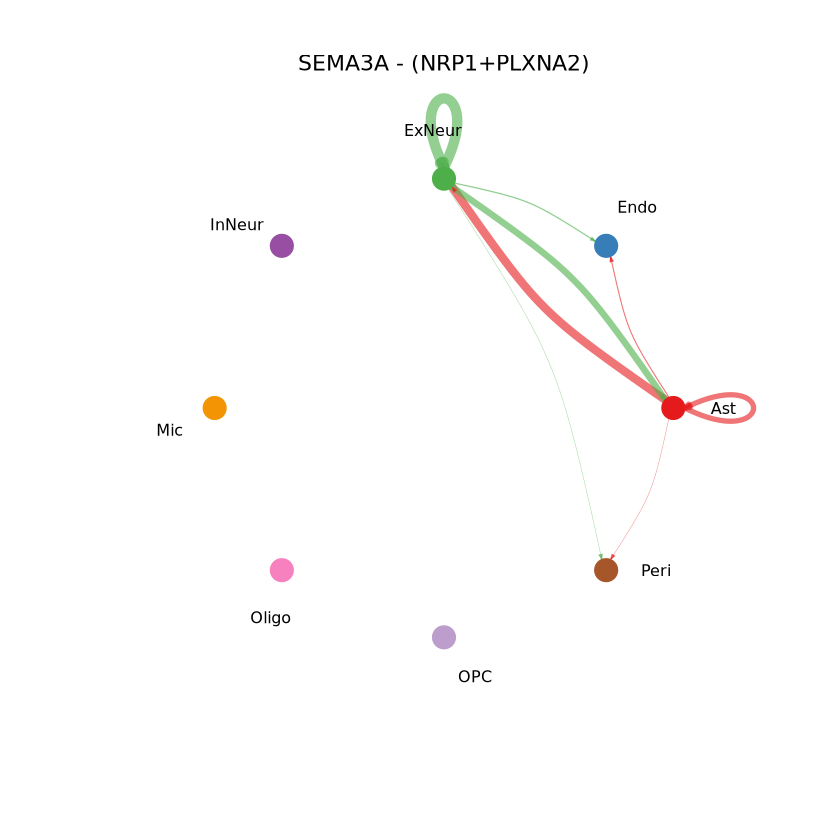

In [13]:
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[1,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)

# Circle plot
# netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")

[[1]]


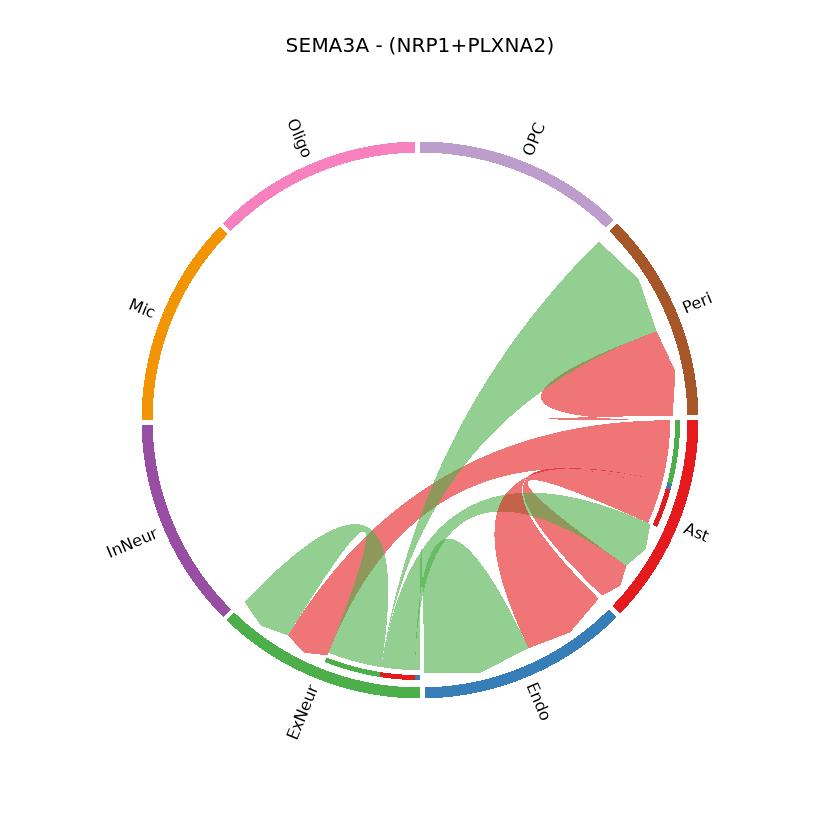

In [14]:
# Chord diagram
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")

# Save plots for all signaling pathways

In [ ]:
prefix = "../../figures/cell_chat_popT_PD/"
# Access all the signaling pathways showing significant communications
pathways.show.all <- cellchat@netP$pathways
# check the order of cell identity to set suitable vertex.receiver
levels(cellchat@idents)
vertex.receiver = seq(1,4)
for (i in 1:length(pathways.show.all)) {
  pdf(paste0("../../man_figs_pdf/cell_chat_PD_const_weight/",pathways.show.all[i],".pdf"), width = 8, height = 8)
  # Visualize communication network associated with both signaling pathway and individual L-R pairs
  # netVisual_aggregate(cellchat, signaling = pathways.show.all[i],layout = "chord")
  netVisual_aggregate(cellchat, signaling = pathways.show.all[i], layout = "circle", edge.width.max = 30)
  dev.off()
  # Compute and visualize the contribution of each ligand-receptor pair to the overall signaling pathway
  gg <- netAnalysis_contribution(cellchat, signaling = pathways.show.all[i])
  ggsave(filename=paste0(prefix, paste0(pathways.show.all[i], "_L-R_contribution.pdf")), plot=gg, width = 6, height = 4, units = 'in', dpi = 300)
}

[1] "Ast"   "Endo"  "ExN"   "InN"   "Mic"   "Oligo" "OPC"

In [ ]:
prefix <- "../../man_figs_pdf/cell_chat_PD_const_weight/"

# 1. get all the significant pathways
pathways.show.all <- cellchat@netP$pathways
pathways.show.all <- c('SEMA3')

# 2. define the cell types to keep (everything except "Mic")
# keep.cells   <- setdiff(levels(cellchat@idents), "Mic")
keep.cells <- levels(cellchat@idents)
keep.indices <- which(levels(cellchat@idents) %in% keep.cells)

for (pathway in pathways.show.all) {
  # — Chord plot without "Mic" —
  pdf(
    file   = paste0(prefix, pathway, "_chord_noMic.pdf"),
    width  = 8, height = 8
  )
  netVisual_aggregate(
    object       = cellchat,
    signaling    = pathway,
    layout       = "chord",
    sources.use  = keep.indices,    # only these as senders
    targets.use  = keep.indices,     # only these as receivers
    remove.isolate = FALSE
  )
  dev.off()
  
}

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]


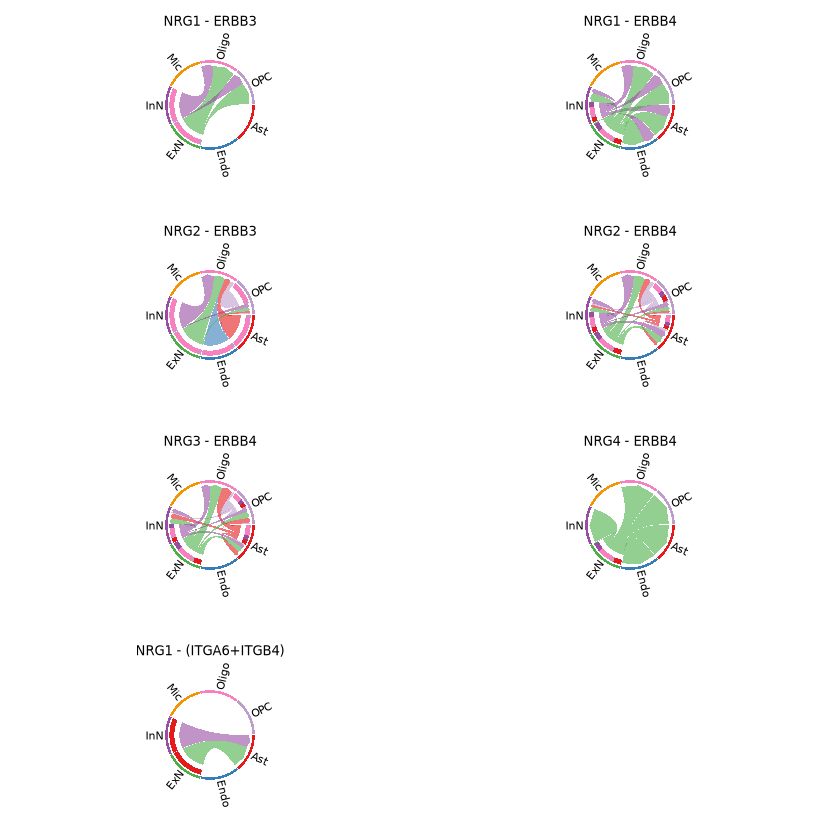

In [4]:
netVisual_individual(cellchat, signaling = 'NRG', layout = "chord")

# Viz multiple ligand-receptors or signaling pathways

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("PSAP"))
pdf(paste0("../../man_figs_pdf/cell_chat_PD/Ast_Out_LR_pathway_PSAP.pdf"), width = 4, height = 4)
netVisual_bubble(
  cellchat,
  sources.use = 1,
  targets.use = c(1,2,3,4,5,6,7),
  pairLR.use = pairLR.use,
  remove.isolate = FALSE
)
dev.off()

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("GAS","PDGF", "PSAP", "SPP1"))
pdf(paste0("../../man_figs_pdf/cell_chat_PD/Mic_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 5, targets.use = c(1,2,3,4,6,7), pairLR.use = pairLR.use, remove.isolate = FALSE)
dev.off()

There is no significant communication of GAS

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("FGF","NRG", "PDGF", "CypA", "PROS", "PSAP", "PTPR", "SEMA3", "SLIT", "SLITRK", "TULP"))
pdf(paste0("../../man_figs_pdf/cell_chat_PD/ExN_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 3, targets.use = c(1,2,4,5,6,7), remove.isolate = FALSE, pairLR.use = pairLR.use)
dev.off()

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("IGF","NRG", "PSAP", "PTPR", "SLIT", "SLITRK", "TGFb"))
pdf(paste0("../../man_figs_pdf/cell_chat_PD/InN_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 4, targets.use = c(1,2,3,5,6,7), remove.isolate = FALSE, pairLR.use = pairLR.use)
dev.off()

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("ANGPT","BMP","FGF", "NRG", "PDGF", "PROS", "PSAP", "PTN", "PTPR", "SEMA3", "TGFb", "VEGF"))
pdf(paste0("../../man_figs_pdf/cell_chat_PD/Ast_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 1, targets.use = c(2,3,4,5,6,7), remove.isolate = FALSE, pairLR.use = pairLR.use)
dev.off()

Comparing communications on a single object 




png 
  2